In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230410210608929483'

In [1]:
import matplotlib.pyplot
import numpy
import torch
matplotlib.pyplot.style.use('ggplot')

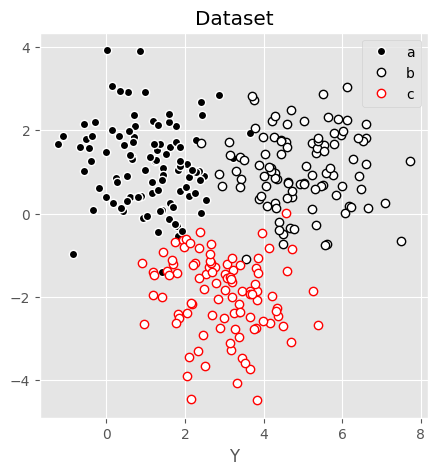

torch.Size([300, 1])

In [2]:
nPerCluster = 100
blur = 1

A = [ 1 ,  1  ]
B = [ 5 , 1]
C = [ 3 , -2]

# generate data
a = [A[0] + numpy.random.randn(nPerCluster)*blur , A[1]+ numpy.random.randn(nPerCluster)*blur ]
b = [B[0]+ numpy.random.randn(nPerCluster)*blur, B[1]+ numpy.random.randn(nPerCluster)*blur ]
c = [C[0]+ numpy.random.randn(nPerCluster)*blur, C[1]+ numpy.random.randn(nPerCluster)*blur ]

# true labels
labels_np = numpy.vstack((numpy.zeros((nPerCluster,1)),numpy.ones((nPerCluster,1)),numpy.ones((nPerCluster,1))+1))

# concatanate into a matrix
data_np = numpy.hstack((a,b,c)).T


# convert data into torch tensors

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = matplotlib.pyplot.figure(figsize=(5,5))
matplotlib.pyplot.plot(data[numpy.where(labels==0)[0],0],data[numpy.where(labels==0)[0],1],'wo',markerfacecolor='black',label='a')
matplotlib.pyplot.plot(data[numpy.where(labels==1)[0],0],data[numpy.where(labels==1)[0],1],'ko',markerfacecolor='white',label='b')
matplotlib.pyplot.plot(data[numpy.where(labels==2)[0],0],data[numpy.where(labels==2)[0],1],'ro',markerfacecolor='white',label='c')
matplotlib.pyplot.title('Dataset')
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('X')
matplotlib.pyplot.xlabel('Y')
matplotlib.pyplot.show()
labels.shape

In [3]:
nn_classifier = torch.nn.Sequential(
    torch.nn.Linear(2,4),
    torch.nn.ReLU(),
    torch.nn.Linear(4,3),
    torch.nn.Softmax(dim=1),
)
lossfun = torch.nn.CrossEntropyLoss()
optmizer = torch.optim.SGD(nn_classifier.parameters(),lr=0.01)

In [4]:
epochs =  10000

losses = torch.zeros(epochs)
onGoingAcc = []
for i in range(epochs):

    pred = nn_classifier(data)
    print(pred.shape)
    loss = lossfun(pred,labels)
    losses[i] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = torch.argmax(pred,axis=1)==labels
    matchesNumeric = matches.float()
    accuracyPct = 100*torch.mean(matchesNumeric)
    onGoingAcc.append(accuracyPct)

predictions = nn_classifier(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels==labels).float())

torch.Size([300, 3])


RuntimeError: 0D or 1D target tensor expected, multi-target not supported

Final Accuracy: 33.3333%


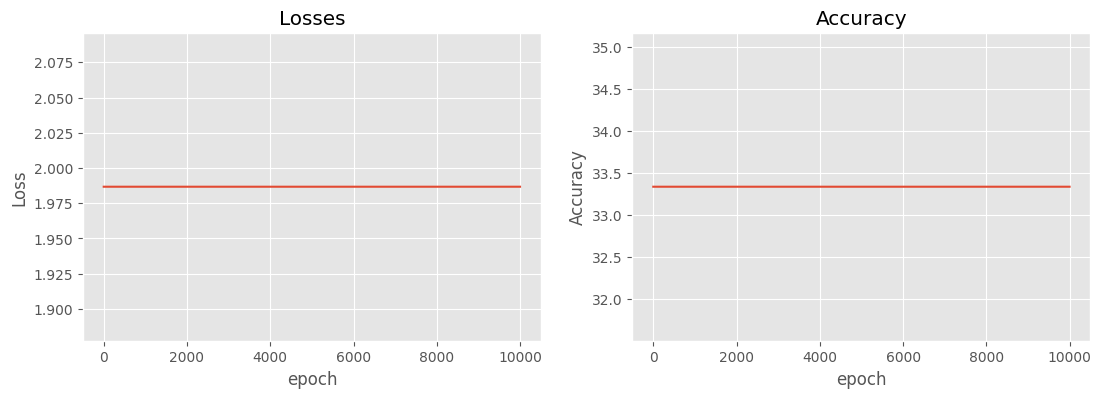

In [44]:
print('Final Accuracy: %g%%'%totalacc)
fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(onGoingAcc)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
matplotlib.pyplot.show()

In [57]:
len(losses)

10000